### The impact of Large Sample Sizes

**When we increase our sample size, even the smallest of differences may seem significant**

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

$$ H_0: u = 67.6$$

$$ H_1: u \ne 67.6$$

### Part I: Sample size with 5

Population mean height

In [104]:
full_data.height.mean()

67.59748697307937

Sanpling statistics

In [105]:
sample1 = full_data.sample(5)

In [106]:
sample1

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [107]:
sample1.height.mean()

67.88234252049084

In [108]:
sample1.height.std()

2.843496555290194

In [109]:
res = []
prev = sample1
for i in range(10000):
    draw = sample1.sample(5, replace=True)
    res.append(draw.height.mean())

sampleing distribtion

In [110]:
np.std(res)

1.141357351999374

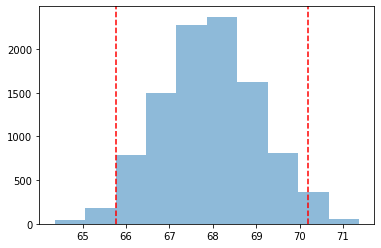

In [111]:
plt.hist(res, alpha=0.5)
plt.axvline(np.percentile(res, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(res, 97.5), c='r', ls='dashed')

Simulation with the normal distribution 

In [112]:
simulation = np.random.normal(67.6, np.std(res), 10000)

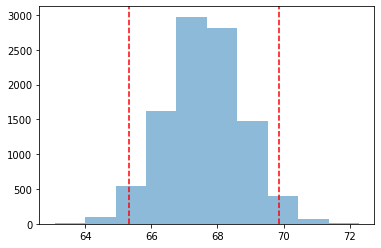

In [113]:
plt.hist(simulation, alpha=0.5)
plt.axvline(np.percentile(simulation, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(simulation, 97.5), c='r', ls='dashed')

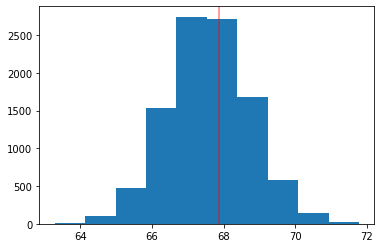

In [115]:
null_mean = 67.60
null_vals = np.random.normal(null_mean, np.std(res), 10000)

plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red', alpha=0.5); # where our sample mean falls on null dist

In [116]:
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()

# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

0.9843

calculate the p-value

**Conclusion: Because the p-value is larger than 5%, we fail to reject null hypothesis**

### Part II: Sample size with 300

In [117]:
sample2 = full_data.sample(300, replace=True)

In [118]:
res2 = []
for i in range(10000):
    draw = sample2.sample(300, replace=True)
    res2.append(draw.height.mean())


Sample statistics

In [119]:
np.mean(res2)

67.19948115446691

In [120]:
np.std(res2)

0.18721706499189897

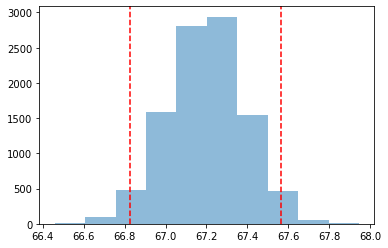

In [122]:
plt.hist(res2, alpha=0.5)
plt.axvline(np.percentile(res2, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(res2, 97.5), c='r', ls='dashed')

Simulation to test the Hypothesis

In [133]:
sample2 = full_data.sample(300)

obs_mean = sample2.height.mean()

In [134]:
sampling_dist_mean300 = []

for _ in range(10000):
    sample_of_300 = sample2.sample(300, replace = True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)    
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

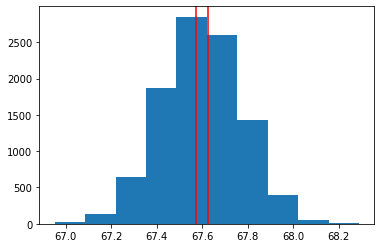

In [135]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [136]:
# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.8765000000000001